<a href="https://colab.research.google.com/github/stanleyhuang12/ds110/blob/main/StanleyHuang_DS110_F24_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW7 (70 points)

This homework also requires the wine.data CSV and winequality-red.csv, found where you downloaded this .ipynb file.

# Problem 1:  Recursion on Data Structures (16 points  [8, 8])

In [1]:
class LinkedList():
    def __init__(self, value):
        self.value = value
        self.next = None

    def append(self, other):
        self.next = other

a, 8 points) Write a *recursive* function listproduct() that takes as an argument a linked list node such as the one defined above, and returns the product of all the values in the list.  If there are no items in the list (it is None), return 0.

In [4]:
# TODO

def listproduct(linked_list):
    if not linked_list:
      return 0
    elif linked_list:
      if linked_list.next is not None:
        return linked_list.value * listproduct(linked_list.next)
      else:
        return linked_list.value


In [5]:
n1 = LinkedList(2)
n2 = LinkedList(5)
n3 = LinkedList(7)
n2.append(n3)
n1.append(n2)
print(listproduct(n1)) # expect 2*5*7=70
print(listproduct(n3)) # expect 7
print(listproduct(None)) # expect 0

70
7
0


In [8]:
class BinaryTree():
  def __init__(self, left, right, value):
    self.left = left
    self.right = right
    self.value = value

sample_tree = BinaryTree(BinaryTree(BinaryTree(None,None,1),
                                    BinaryTree(None,None,2),
                                    3),
                         BinaryTree(BinaryTree(BinaryTree(None,None,4),
                                               BinaryTree(None,None,5),
                                               6),
                                    BinaryTree(None,None,7),
                                    8),
                         9)
sample_tree2 = BinaryTree(None, BinaryTree(None, BinaryTree(None, BinaryTree(None,None,1),2),3),4)

b, 8 points) Write a function count_full_branches() that takes a binary tree and *recursively* counts the number of nodes that have both a left and right child.  Assume the tree argument was created using the provided binary tree class.  A missing child is signified by a left or right field that is None.  (The value field is not useful for this exercise.)

In [25]:
# TODO count_full_branches()

def count_full_branches(binary_tree):
  if not binary_tree.left or not binary_tree.right:
    return 0
  elif binary_tree.left and binary_tree.right:
    return 1 + count_full_branches(binary_tree.left) + count_full_branches(binary_tree.right)


In [23]:
print(count_full_branches(sample_tree)) # Expect 4
print(count_full_branches(sample_tree2)) # Expect 0

4
0


# Problem 2:  Nearest neighbors (32 points:  4,3,4,3,4,14)

In this problem, we'll train on a dataset where the labels are different varieties ("cultivars") of wine, and the features are different chemical measurements of the wine.

Upload the wine.data file.

In [26]:
from google.colab import files

uploaded = files.upload() # Upload wine.data

Saving wine.data to wine.data


We next set up a dataframe to organize the data.

In [28]:
# wine.data:  see https://archive.ics.uci.edu/ml/datasets/Wine
import pandas as pd

col_names = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash',
             'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
             'Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']

df = pd.read_csv('wine.data', names=col_names)
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We then separate the data into features (X) and labels (y).

In [31]:
y = df['Type']
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [32]:
X = df.iloc[:,1:]
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


a, 4 pts) Explain what the next code box is doing, and why it is important to do it for a nearest neighbors classifier training on this data.

In [34]:
for col in range(13):
  X.iloc[:,col] = X.iloc[:,col]/X.iloc[:,col].max()

"""
Explanation:
For each column for 12 iterations, take all the values in that column and divide it by the max value of that column. This is one way of
standardizing all the values. Nearest neighbors classifiers uses Euclidean distance; thus the distance measure between all features are more comparable
and useful for KNN. It makes the values between 0 and 1 and thus can be used a standardized way of comparing distance.
"""

<ipython-input-34-33b3f76e02a1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.783951
1      0.617284
2      0.623457
3      0.697531
4      0.728395
         ...   
173    0.586420
174    0.629630
175    0.740741
176    0.740741
177    0.592593
Name: Magnesium, Length: 178, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:,col] = X.iloc[:,col]/X.iloc[:,col].max()
<ipython-input-34-33b3f76e02a1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.633929
1      0.625000
2      0.705357
3      0.880952
4      0.437500
         ...   
173    0.440476
174    0.446429
175    0.497024
176    0.500000
177    0.333333
Name: Proline, Length: 178, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:,col] = X.iloc[:

' \nExplanation: \nFor each column for 12 iterations, take all the values in that column and divide it by the max value of that column. This is one way of \nstandardizing all the values. Nearest neighbors classifiers uses Euclidean distance; thus the distance measure between all features are more comparable\nand useful for KNN. \n'

In [35]:
X.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500


**TODO answer to (a)**

b, 3 pts) Now use scikit-learn's train_test_split() function to separate X and y into training and test sets.  Pass in the argument random_state=110 so that your split is consistent with other students' and ours.

In [36]:
# TODO

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=110)


c, 4 pts) Train a k-nearest neighbors classifier on the training data, where k is 3.

In [53]:
# TODO
from sklearn.neighbors import KNeighborsClassifier

kneighbors = KNeighborsClassifier(n_neighbors=3)
kneighbors.fit(X_train, y_train)
y_pred = kneighbors.predict(X_test)


(54,)

d, 3 pts) Use the score() method of the nearest neighbors classifier on the test data, to determine how well this classifier does on the withheld data.

In [60]:
# TODO

accuracy = kneighbors.score(X_test, y_test)
accuracy

0.9629629629629629

e, 4pts) Evaluating with score() on the training data instead of the testing data should give 100% accuracy if k=1.  Why?

**TODO answer to (e)**

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
accuracy_traindata = knn.score(X_train, y_train)
accuracy_traindata

"""
Essentially KNN is memorizing a decision rule for every single point (k=1) in the training data. Once KNN is fitted to the training data it
memorizes where every point is. Then when it is tested on the same X_train, y_train, it can output what it memorized, which is not impressive.
"""

1.0

f, 14 pts) Now, we'll try creating our own "1-nearest neighbors" classifier.

Create a NearestNeighborsModel class with the following methods:

<code>\_\_init\_\_()</code>:  Takes an $m \times n$ 2D array of training data features and a 1D array of training data label values as arguments.  It should remember these so that it can carry out the next method.  2D array row $i$ contains the features that are classified with 1D array label $i$.

<code>classify()</code>:  Takes a 1D array of $n$ features as an argument, and returns the label of the closest point in the training data.

<code>find_closest()</code>:  This is a helper for classify().  Return the index of the closest row in the training data to the 1D array argument.  Consider calling numpy.linalg.norm() on $point-row$ to help with this.

You can assume the inputs to these methods are arrays with at least one value.

In [85]:
# TODO
import numpy as np

class NearestNeighborsModel:

  def __init__(self, train_data, features):
    self.train_data = train_data
    self.features = features
  def find_closest(self, array):
    """
    Normalizes the train_data,
    Return index of the closest row to the training data
    """
    closest  = np.linalg.norm(self.train_data - array, axis = 1)
    return closest

  def classify(self, point):
    dist = self.find_closest(point)
    index_closest = np.argmin(dist)
    return self.features[index_closest]




In [86]:
features = np.array([[0, 0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2]])
labels = np.array([0, 1, 2])

my_model = NearestNeighborsModel(features, labels)
print(my_model.classify(np.array([3,3,3,3]))) # expect 2
print(my_model.classify(np.array([-1,-1,-1,-1]))) # expect 0

2
0


# Problem 3:  Decision trees (22 points:  8, 6, 4, 4)

a, 8 pts) Using the same train/test split as the previous problem, train a scikit-learn entropy-based decision tree classifier on the scaled data, and use score() to evaluate the classifier.  When creating the DecisionTreeClassifier, pass in the argument random_state=110 so its behavior is not random and matches our solution.

In [96]:
# TODO train and evaluate DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=110)
tree_classifier.fit(X_train, y_train)
tree_classifier.score(X_test, y_test)

0.9259259259259259

b, 6 pts) What does "overfitting" mean?  Call score() on the training data.  Is this performance consistent with the idea that the model is overfitting?

In [90]:
# TODO call score()

tree_classifier.score(X_train, y_train)

"""

Overfitting occurs when a model memorizes and learns the random perturbations of the model-- thus not allowing for the model to be  generalizable. If we train the Decision
Tree Classifier on the data it learned, of course, it will spit out the answer that it memorized; so yes, it could be seen as a overfitting.
"""

1.0

**TODO overfitting explanation and whether model appears to be overfitting**

c, 4 points) Experiment with setting the following parameters of the DecisionTreeClassifier constructor:  max_depth=3, min_samples_leaf=8.  Does the evidence from train and test performance suggest the model is overfitting now?  

In [95]:
# TODO evaluate a DecisionTreeClassifier with the given parameters

tree_classifier_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 8)
tree_classifier_2.fit(X_train, y_train)
print(tree_classifier_2.score(X_train, y_train))
print(tree_classifier_2.score(X_test, y_test))

"""The model does not appear to be overfitting,  while the accuracy is not 100% it is nonetheless high"""

0.9758064516129032
0.8888888888888888


**TODO is there evidence of overfitting now?**

The model does not appear to be overfitting,  while the accuracy is not 100% it is nonetheless high.


d, 4 points) Using tree.plot_tree(), draw the tree you made in part (c).  You don't need to name the types or features.




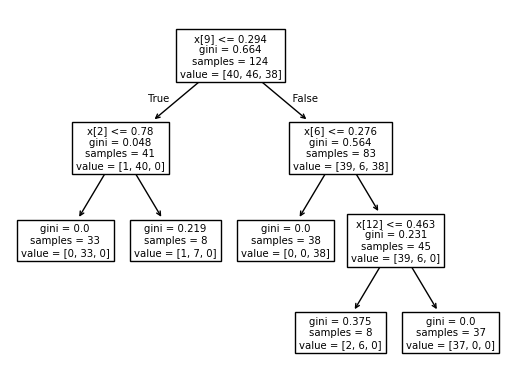

In [98]:
# TODO tree.plot_tree()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(tree_classifier_2)
plt.show()
